In [93]:
include("CVaR_functions.jl")
include("finance_functions.jl")
using .CVaR_functions
using .finance_functions
using LinearAlgebra
using Statistics
using SparseArrays
using CSV
using TSFrames, MarketData, DataFrames, Dates,Plots

tickers = ["SPY","TLT","DBC", "NVO","RHM.DE","AAPL","GS","LLY","BX","JPM","AMZN","MSFT","CSCO","WMT","KO","CL","GE","BA","RTX","NOC","VPU"]
start_date = DateTime(2010, 8, 1)
end_date = DateTime(2024, 8, 20)
df =DataFrame( get_adjclose_dataframe(tickers, start_date, end_date))
df = compute_relative_returns(df)
matrix_data = Matrix(df)
#matrix_data = hcat(matrix_data, 0.0*ones(size(matrix_data, 1)))

#We choose monthly 95% cvar to be leq 0.1
optimal_weights = optimize_portfolio_CVaR_const(-matrix_data[1:end,2:end],0.05,false,0.95)
#And arrive almost at the 60-40 portfolio
#Now assume we start with an 50-40-10 portfolio and we wish to rebalance to such that our risk is below 10%, 
n = size(matrix_data,2)-1
println(optimal_weights[1:n])



[1.334533267534575e-16, 0.3523305624594618, 0.161580935817879, 0.0, 4.420561212285561e-18, 0.0, 0.0, 0.23275900723827997, 0.0, 0.06108548194185612, 0.0, 0.0, 0.0, 0.03403999981517195, 0.0, 0.0, 0.0627329373088419, 0.0, 0.0, 0.0945193141602897, 0.0009517612582194571]


In [94]:
hcat(tickers, optimal_weights[1:n]*100)

21×2 Matrix{Any}:
 "SPY"      1.33453e-14
 "TLT"     35.2331
 "DBC"     16.1581
 "NVO"      0.0
 "RHM.DE"   4.42056e-16
 "AAPL"     0.0
 "GS"       0.0
 "LLY"     23.2759
 "BX"       0.0
 "JPM"      6.10855
 ⋮         
 "CSCO"     0.0
 "WMT"      3.404
 "KO"       0.0
 "CL"       0.0
 "GE"       6.27329
 "BA"       0.0
 "RTX"      0.0
 "NOC"      9.45193
 "VPU"      0.0951761

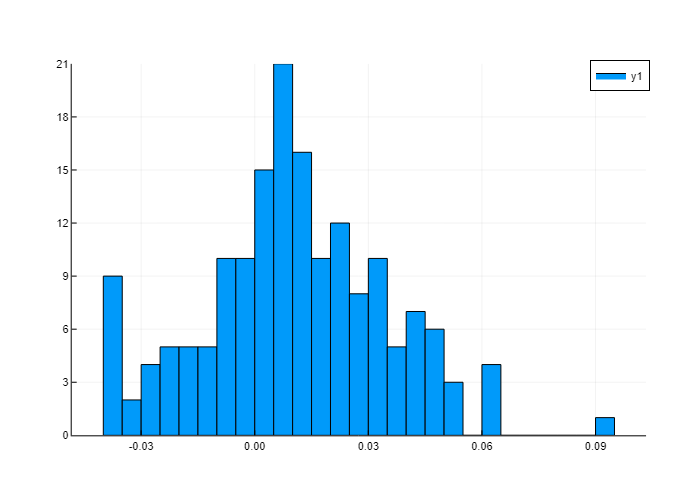

In [96]:
histogram(matrix_data[1:end,2:end]*optimal_weights[1:n],bins=30)

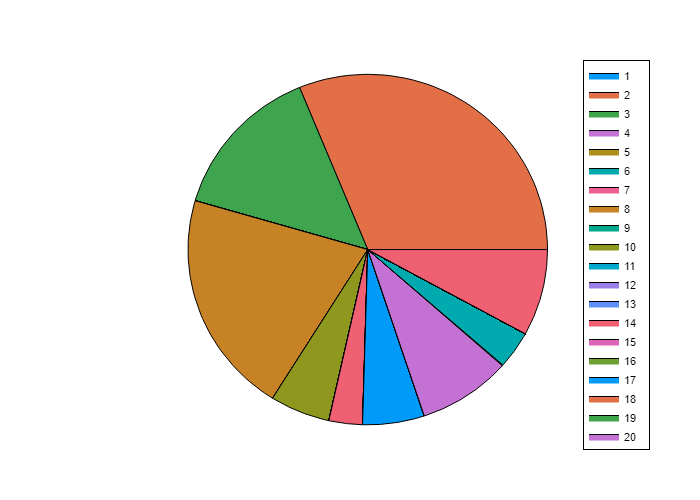

In [97]:
pie(optimal_weights)